## Матстатистика - ИДЗ 1

Пункт 4: моделирование величин *x* и *y*.

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import pandas as pd
from scipy import stats
%matplotlib inline

Сначала определим 2 функции, принимающие на вход значение величины, сэмплированной из равномерного распределения и выдающие соответсвующее значение *x* и *y*.

Аналитически полученная обратная функция для моделирования *x* выдавала комплексные значения, поэтому воспользуемся аппроксимацией:

In [2]:
# Fy = -0.75x^3 + 0.5x^2 + 1.25x

x = [0.001 * i for i in range(1001)] # задаём 1000 точек отрезка [0,1] 
x = np.array(x)
x = -0.75*x**3 + 0.5*x**2 + 1.25*x
x

array([0.        , 0.0012505 , 0.00250199, ..., 0.99999301, 0.99999825,
       1.        ])

In [3]:
# функция для моделирования x

def X_model(xi, vector):
    vector_delta = abs(vector - xi) # находим модуль разницы между величиной и значениями функции распределения
    
    return vector.flat[np.argmin(vector_delta)]

In [4]:
# Fy = y^3
# функция для моделирования y

def Y_model(eta):
    
    return eta ** (1/3)

Также создадим функцию для сэмплирования выборки *(х,y)* нужного объёма N

In [5]:
def samplier(N):
    Y_sample = []
    X_sample = []
    k = 0 # счётчик размера выборки
    while k < N:
        x_current = X_model(np.random.uniform(1,0,1),x)  # сэмплируем точку выборки X
        y_current = Y_model(np.random.uniform(1,0,1))    # сэмплируем точку выборки Y
        if y_current > x_current:                        # если полученная точка принадлежит области D
            Y_sample.append(y_current)
            X_sample.append(x_current)                   # добавляем её в набор
            k += 1                                       # и увеличиваем счётчик на единицу
    return [X_sample, Y_sample] # возвращаем список из двух векторов в виде списков

## Моделирование случайных величин

In [6]:
sample_20 = samplier(20)
sample_50 = samplier(50)
sample_100 = samplier(100)

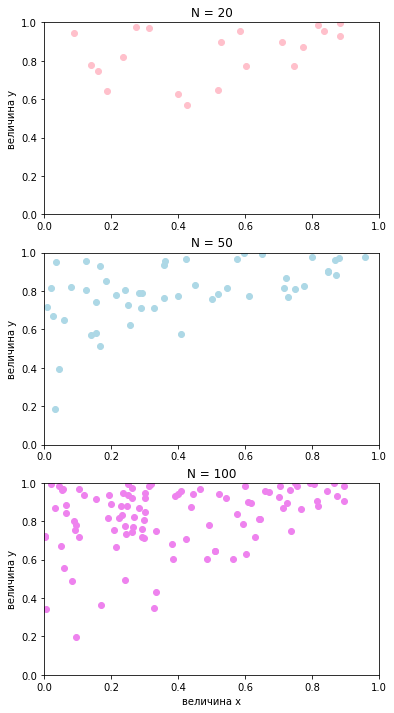

In [7]:
fig, ax = plt.subplots()

plt.subplot(311)
plt.scatter(np.array(sample_20[0]), np.array(sample_20[1]), c = 'pink')
plt.xlim([0, 1])
plt.ylim([0, 1])

plt.title('N = 20') 
plt.ylabel('величина y')

plt.subplot(312)
plt.scatter(np.array(sample_50[0]), np.array(sample_50[1]), c = 'lightblue')
plt.xlim([0, 1])
plt.ylim([0, 1])

plt.title('N = 50') 
plt.ylabel('величина y')

plt.subplot(313)
plt.scatter(np.array(sample_100[0]), np.array(sample_100[1]), c = 'violet')
plt.xlim([0, 1])
plt.ylim([0, 1])

plt.title('N = 100') 
plt.xlabel('величина x')
plt.ylabel('величина y')

fig.set_figwidth(6)    
fig.set_figheight(12)

In [8]:
data_20 = pd.DataFrame({'X':sample_20[0],'Y':sample_20[1]})   # инициализируем модели
X_20 = data_20.X.values
y_20 = data_20.Y.values

reg_20 = LinearRegression().fit(X_20.reshape(-1, 1), y_20)

data_50 = pd.DataFrame({'X':sample_50[0],'Y':sample_50[1]})
X_50 = data_50.X.values
y_50 = data_50.Y.values

reg_50 = LinearRegression().fit(X_50.reshape(-1, 1), y_50)

data_100 = pd.DataFrame({'X':sample_100[0],'Y':sample_100[1]})
X_100 = data_100.X.values
y_100 = data_100.Y.values

reg_100 = LinearRegression().fit(X_100.reshape(-1, 1), y_100)

In [77]:
def regression_coef(model, X, y, N):
    # создаём датафрейм, в котором одна колонка - название коэффициентов, другая - их величина
    coef = pd.DataFrame({'predictor':['intercept', 'X'], 'coef':[model.intercept_, model.coef_[0]]})
    
    X1 = np.append(X.reshape(-1, 1), np.ones((len(X),1)), axis=1)

    RSS = metrics.mean_squared_error(y, model.predict(X.reshape(-1, 1))) * N / (N-1)
    var_b = RSS * (np.linalg.inv(np.dot(X1.T, X1)).diagonal())
    sd_b = np.sqrt(var_b)
    
    t = np.array([reg_20.intercept_, reg_20.coef_[0]])/ sd_b
    coef['pvalue'] = [2 * (1 - stats.t.cdf(np.abs(i), (N - 1))) for i in t]
    coef['is_significant'] = coef['pvalue'] < 0.01
    return coef

## N = 20

In [78]:
regression_coef(reg_20, X_20, y_20,20)

,predictor,coef,pvalue,is_significant
0,intercept,0.748693,0.000001,True
1,X,0.177058,0.009156,True


In [37]:
print('Регрессионная прямая (МНК) для N=20 будет иметь вид:')
print('Y=',reg_20.intercept_, '+', reg_20.coef_[0],'X')
RSS_20 = metrics.mean_squared_error(y_20, reg_20.predict(X_20.reshape(-1, 1))) * 20
print('RSS равен:',RSS_20)
print('Var исправленная равна:', RSS_20/19)
print('R^2 равен:', reg_20.score(X_20.reshape(-1, 1),y_20))

Регрессионная прямая (МНК) для N=20 будет иметь вид:
Y= 0.7486932336543821 + 0.17705830251166857 X
RSS равен: 0.3026749104328217
Var исправленная равна: 0.01593025844383272
R^2 равен: 0.12578299048856756


## N = 50

In [79]:
regression_coef(reg_50, X_50, y_50,50)

,predictor,coef,pvalue,is_significant
0,intercept,0.674155,9.547918e-15,True
1,X,0.295135,3.437372e-06,True


In [82]:
print('Регрессионная прямая (МНК) для N=50 будет иметь вид:')
print('Y=',reg_50.intercept_, '+', reg_50.coef_[0],'X')
RSS_50 = metrics.mean_squared_error(y_50, reg_50.predict(X_50.reshape(-1, 1))) * 50
print('RSS равен:',RSS_50)
print('Var исправленная равна:', RSS_50/49)
print('R^2 равен:', reg_50.score(X_50.reshape(-1, 1),y_50))

Регрессионная прямая (МНК) для N=50 будет иметь вид:
Y= 0.6741549175276168 + 0.2951353664387125 X
RSS равен: 0.9282089185798743
Var исправленная равна: 0.018943039154691314
R^2 равен: 0.2749914603034782


## N = 100

In [80]:
regression_coef(reg_100, X_100, y_100,100)

,predictor,coef,pvalue,is_significant
0,intercept,0.741412,0.000000e+00,True
1,X,0.202912,1.501104e-08,True


In [83]:
print('Регрессионная прямая (МНК) для N=100 будет иметь вид:')
print('Y=',reg_100.intercept_, '+', reg_100.coef_[0],'X')
RSS_100 = metrics.mean_squared_error(y_100, reg_100.predict(X_100.reshape(-1, 1))) * 100
print('RSS равен:',RSS_100)
print('Var исправленная равна:', RSS_100/99)
print('R^2 равен:', reg_100.score(X_100.reshape(-1, 1),y_100))

Регрессионная прямая (МНК) для N=100 будет иметь вид:
Y= 0.74141243441721 + 0.20291211814300805 X
RSS равен: 2.4776474983269123
Var исправленная равна: 0.02502674240734255
R^2 равен: 0.09791254175021846


## Сравнение МНК-оценок с proj<1,x>(Y)

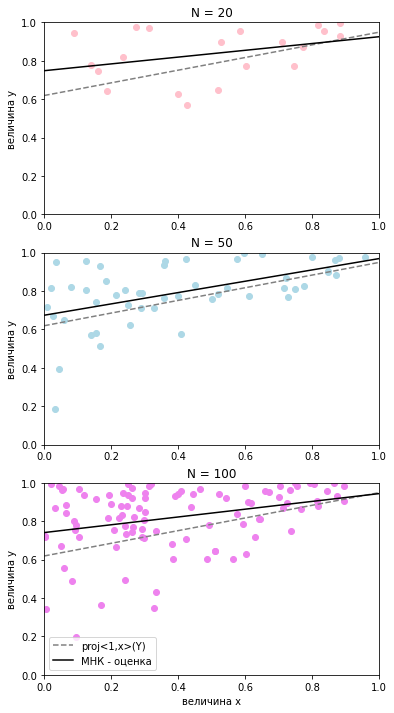

In [98]:
fig, ax = plt.subplots()

plt.subplot(311)
plt.scatter(np.array(sample_20[0]), np.array(sample_20[1]), c = 'pink')
plt.xlim([0, 1])
plt.ylim([0, 1])

x = np.linspace(0, 1, 100)
h = 0.7486932336543821 + 0.17705830251166857 * x # МНК - оценка N = 20
g = 0.6741549175276168 + 0.2951353664387125 * x # МНК - оценка N = 50
f = 0.74141243441721 + 0.20291211814300805 * x # МНК - оценка N = 100
z = 428/691 + 228/691 * x # proj<1,x>(Y)

plt.plot(x,z,
        color = 'grey',
        linestyle = 'dashed') 
plt.plot(x,h,
        color = 'black') 
plt.title('N = 20') 
plt.ylabel('величина y')

plt.subplot(312)
plt.scatter(np.array(sample_50[0]), np.array(sample_50[1]), c = 'lightblue')
plt.xlim([0, 1])
plt.ylim([0, 1])

plt.plot(x,z,
        color = 'grey',
        linestyle = 'dashed') 
plt.plot(x,g,
        color = 'black') 

plt.title('N = 50') 
plt.ylabel('величина y')

plt.subplot(313)
plt.scatter(np.array(sample_100[0]), np.array(sample_100[1]), c = 'violet')
plt.xlim([0, 1])
plt.ylim([0, 1])

plt.plot(x,z,
        color = 'grey',
        linestyle = 'dashed') 
plt.plot(x,f,
        color = 'black') 

plt.title('N = 100') 
plt.xlabel('величина x')
plt.ylabel('величина y')
plt.legend(['proj<1,x>(Y)', 'МНК - оценка'])

fig.set_figwidth(6)    
fig.set_figheight(12)